In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, auc

In [2]:
data = pd.read_csv('S:/fraud dataset/Fraud.csv', chunksize=1900000)

In [3]:
for chunks in data:
    print(chunks.shape)

(1900000, 11)
(1900000, 11)
(1900000, 11)
(662620, 11)


In [4]:
data=chunks

In [5]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5720408,398,PAYMENT,7899.40,C2073439622,0.00,0.00,M2076377623,0.00,0.00,0,0
5720289,398,CASH_IN,239953.69,C1496532349,11049.00,251002.69,C769312811,4257596.42,4017642.73,0,0
6277044,640,CASH_IN,397065.61,C2113434941,23094.00,420159.61,C1842243704,108937.38,0.00,0,0
5888909,403,CASH_IN,216577.41,C2089955889,85445.00,302022.41,C2016308627,7534586.07,7361552.31,0,0
6095327,522,PAYMENT,13224.71,C361456738,34598.91,21374.20,M890734523,0.00,0.00,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662620 entries, 5700000 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            662620 non-null  int64  
 1   type            662620 non-null  object 
 2   amount          662620 non-null  float64
 3   nameOrig        662620 non-null  object 
 4   oldbalanceOrg   662620 non-null  float64
 5   newbalanceOrig  662620 non-null  float64
 6   nameDest        662620 non-null  object 
 7   oldbalanceDest  662620 non-null  float64
 8   newbalanceDest  662620 non-null  float64
 9   isFraud         662620 non-null  int64  
 10  isFlaggedFraud  662620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 55.6+ MB


In [7]:
data.duplicated().value_counts()

False    662620
Name: count, dtype: int64

In [8]:
#see statistical measures
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,662620.000000,6.626200e+05,6.626200e+05,6.626200e+05,6.626200e+05,6.626200e+05,662620.000000,662620.000000
mean,496.740452,1.680283e+05,7.537256e+05,7.689377e+05,1.196791e+06,1.288611e+06,0.005717,0.000018
std,101.902434,4.109657e+05,2.552330e+06,2.578379e+06,4.109849e+06,4.175612e+06,0.075392,0.004256
min,398.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,403.000000,1.305841e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,474.000000,7.065667e+04,1.593800e+04,0.000000e+00,1.075769e+05,1.854002e+05,0.000000,0.000000
75%,573.000000,2.012567e+05,1.076580e+05,1.410075e+05,9.073872e+05,1.045937e+06,0.000000,0.000000
max,743.000000,1.541594e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000,1.000000


In [9]:
data.describe(include=object)

,type,nameOrig,nameDest
count,662620,662620,662620
unique,5,662520,534705
top,PAYMENT,C515118379,C229021471
freq,229253,2,8


In [10]:

#check null values in dataset
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#check unique values
data.nunique()

step                 346
type                   5
amount            645631
nameOrig          662520
oldbalanceOrg     266819
newbalanceOrig    292341
nameDest          534705
oldbalanceDest    370358
newbalanceDest    397176
isFraud                2
isFlaggedFraud         2
dtype: int64

In [12]:
# Print column names
print(data.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


type
PAYMENT     229253
CASH_OUT    221626
CASH_IN     147763
TRANSFER     59171
DEBIT         4807
Name: count, dtype: int64


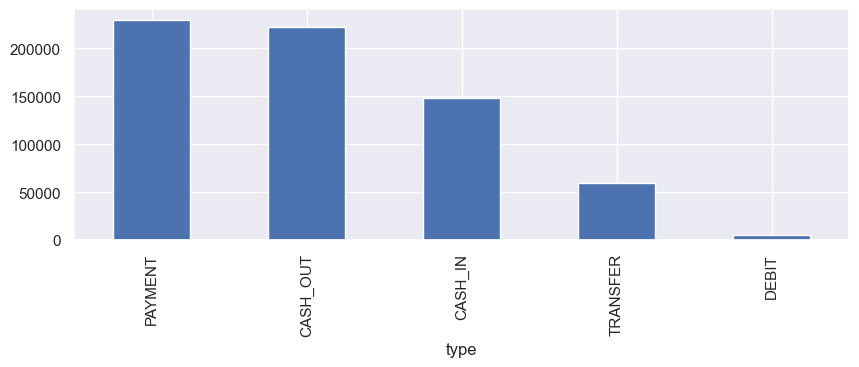

In [13]:
sns.set(rc={'figure.figsize':(10,3)})
data.type.value_counts().plot(kind='bar')
print(data.type.value_counts())

In [14]:
#check correlation
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_data.corr()

In [15]:
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.010414,-0.039446,-0.041383,-0.007223,-0.007115,0.054679,0.005262
amount,0.010414,1.000000,0.057252,0.012335,0.144413,0.223091,0.256199,0.055265
oldbalanceOrg,-0.039446,0.057252,1.000000,0.995378,0.067677,0.052273,0.032013,0.014494
newbalanceOrig,-0.041383,0.012335,0.995378,1.000000,0.070311,0.051448,-0.014022,0.014323
oldbalanceDest,-0.007223,0.144413,0.067677,0.070311,1.000000,0.995306,-0.010591,-0.001239
newbalanceDest,-0.007115,0.223091,0.052273,0.051448,0.995306,1.000000,0.001883,-0.001313
isFraud,0.054679,0.256199,0.032013,-0.014022,-0.010591,0.001883,1.000000,0.056123
isFlaggedFraud,0.005262,0.055265,0.014494,0.014323,-0.001239,-0.001313,0.056123,1.000000


<Axes: >

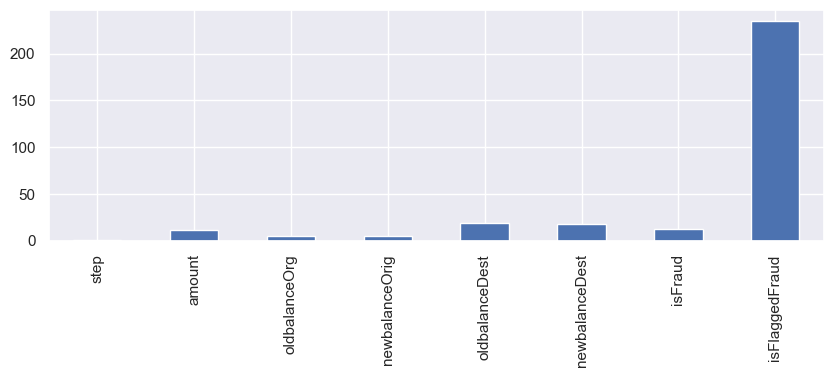

In [16]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate skewness
skewness = numeric_data.skew()

# Plot skewness
skewness.plot(kind='bar')

In [17]:
print(data.columns)
data.dtypes

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<Axes: >

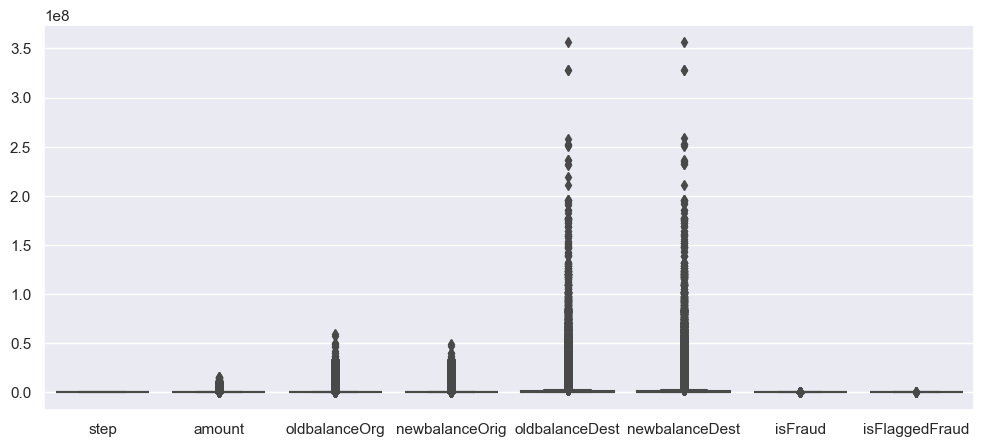

In [18]:
#Draw boxplot
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(data = data)

In [19]:
#convert categorical variable into numerical
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
data['type'] = OE.fit_transform(data[['type']])

In [20]:
data = data.drop(['nameOrig','nameDest'], axis = 'columns')
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5700000,398,3.0,11049.92,172026.62,160976.70,0.00,0.00,0,0
5700001,398,1.0,293878.48,99129.00,0.00,73233.24,367111.73,0,0
5700002,398,1.0,128578.22,31124.00,0.00,380293.23,508871.45,0,0
5700003,398,0.0,280791.81,17022.00,297813.81,2689280.82,2408489.01,0,0
5700004,398,1.0,37678.62,297813.81,260135.20,77720.16,115398.78,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1.0,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4.0,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4.0,850002.52,850002.52,0.00,0.00,0.00,1,0


In [21]:
a = data.drop(['isFraud'], axis = 'columns')
b = data['isFraud']

In [22]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
a = SS.fit_transform(a)

In [23]:
# Split the data into X and y
X = a  # Exclude the 'isFraud' column from input features
y = b  # Target variable

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(530096, 8)
(132524, 8)
(530096,)
(132524,)


In [25]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.9982965349672512
0.9982644653043977


In [27]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.9968326491805258
0.9968307627297697


In [32]:
# Define the parameter grid to search over
param_dist = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = RandomForestClassifier()

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 5, 'max_depth': 15}


In [34]:
# Evaluate the model with the best hyperparameters on the validation set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.998860583743322


In [35]:
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test,y_pred, average = 'macro'))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy_score: 0.998860583743322
f1_score: 0.9429894407873713


array([[131783,      5],
       [   146,    590]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131788
           1       0.99      0.80      0.89       736

    accuracy                           1.00    132524
   macro avg       1.00      0.90      0.94    132524
weighted avg       1.00      1.00      1.00    132524



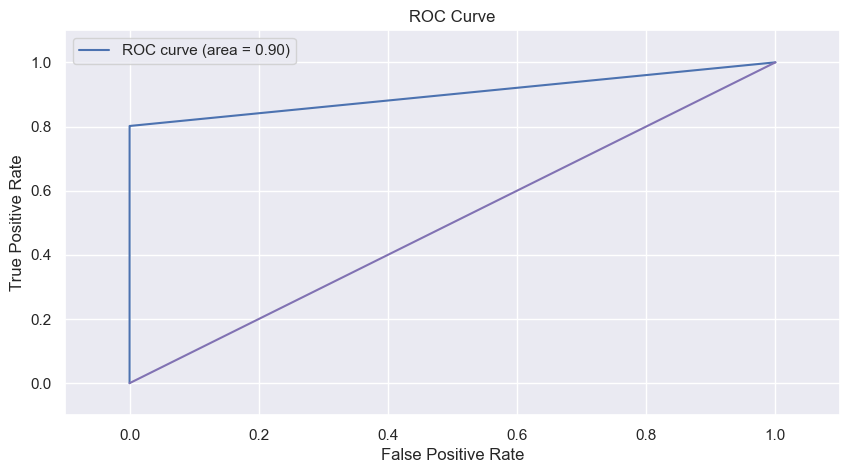

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

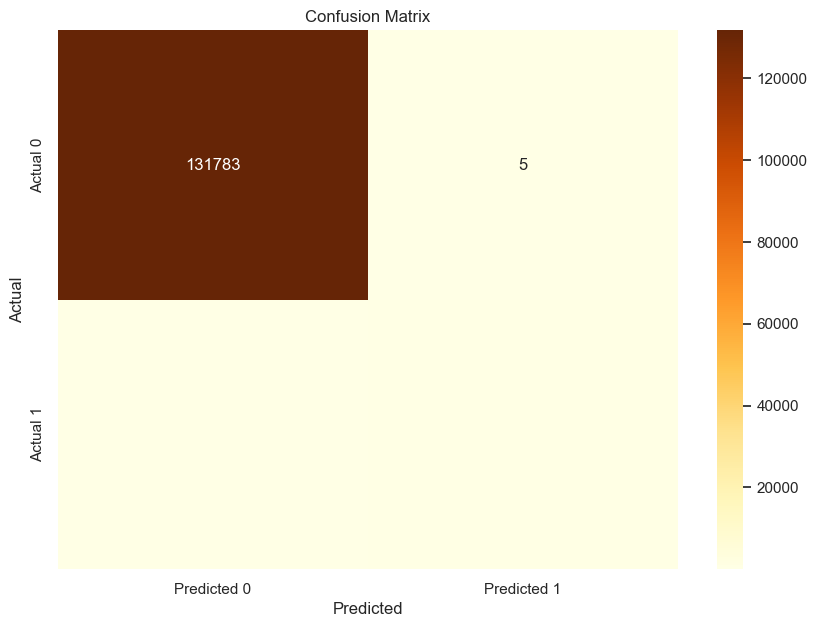

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
